In [42]:
import arviz as az
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf
import sys
# sys.path.append('./../figures/')
from makeCorner import *
import pandas as pd

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Load the data from the NetCDF file

# test = az.from_netcdf("Xeff_N_GP_O4a.cdf")
data = az.from_netcdf(".../output/Xeff_mixture_O4a.cdf")

#data = az.from_netcdf("Xeff_mixture_O4_mass_grid_to_2.3.cdf")
#data = az.from_netcdf("Xeff_mixture_O4_mass_grid_to_2.3_w_fixed_changed_ALpriors.cdf")
#data = az.from_netcdf("Xeff_mixture_O4_mass_grid_to_2.3_w_fixed_changed_ALpriors.cdf")

az.summary(data)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '.../output/Xeff_mixture_O4a.cdf', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

<function matplotlib.pyplot.show(close=None, block=None)>

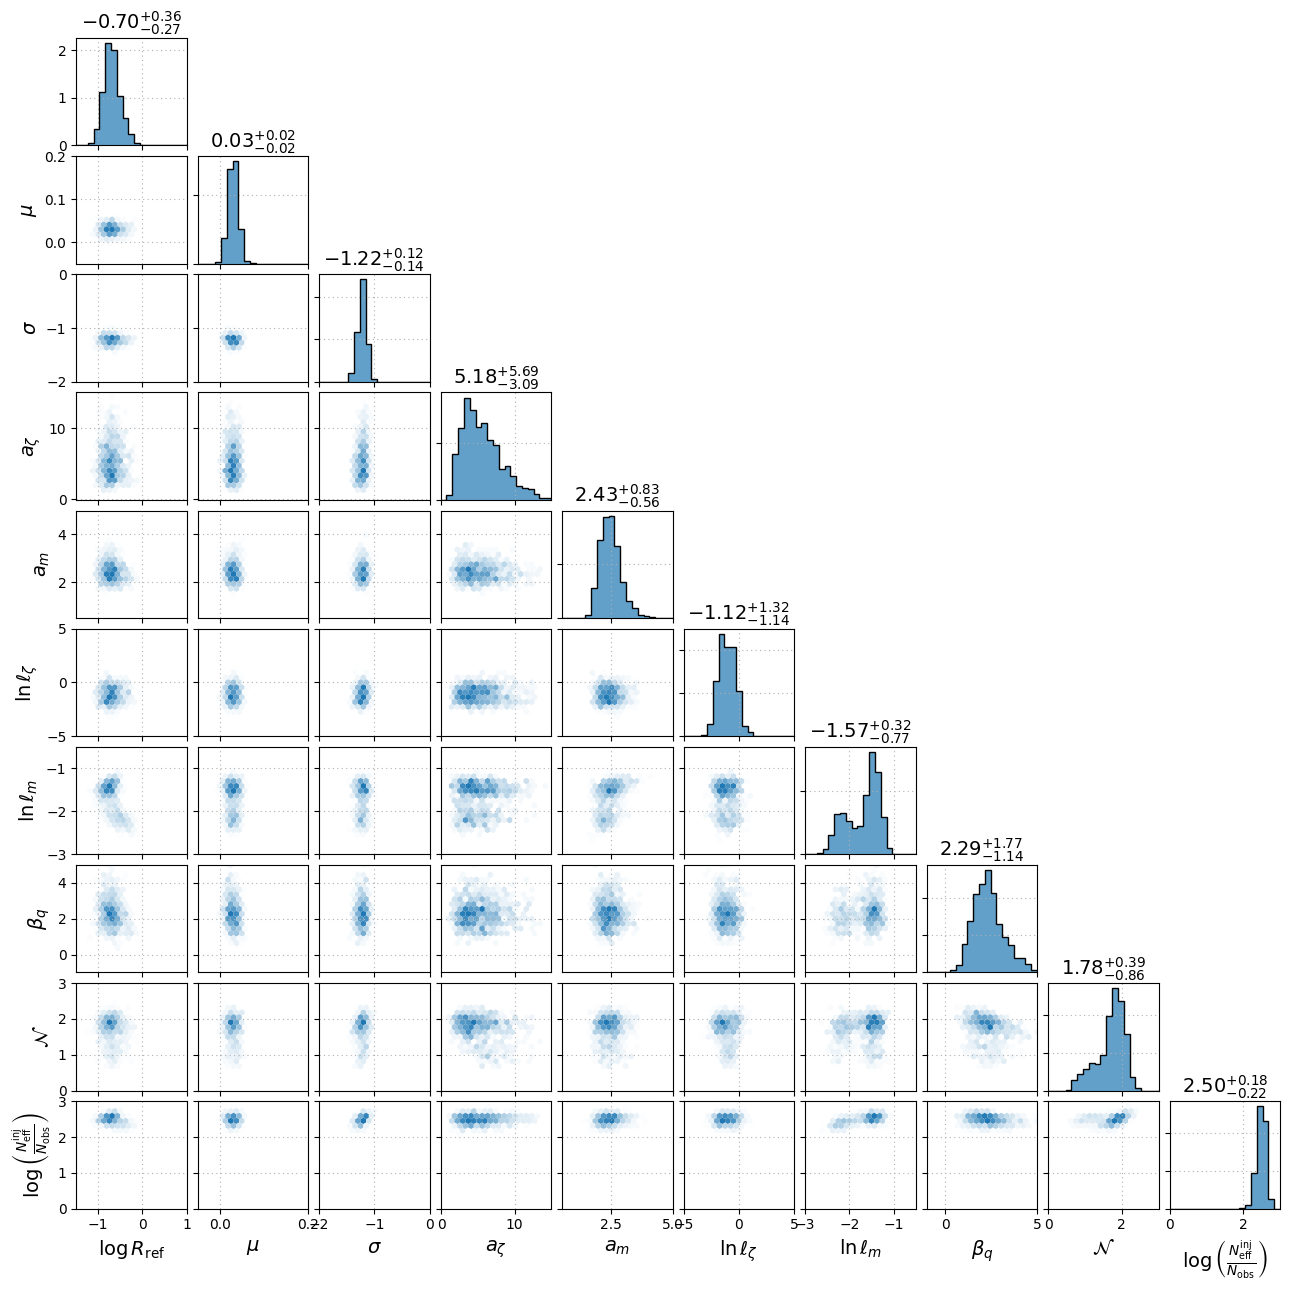

In [2]:
stacked_samples2 = data.posterior.stack(draws=("chain", "draw"))
fig = plt.figure(figsize=(13,13))
toPlot = {
        "R20":{"data":stacked_samples2.logR20,"plot_bounds":(-1.5,1),"label":r"$\log R_{\rm ref}$"},
    "mu":{"data":stacked_samples2.mu_eff_lowM,"plot_bounds":(-0.05,0.2),"label":r"$\mu$"},
    "sigma":{"data":stacked_samples2.logsig_eff_lowM,"plot_bounds":(-2,0),"label":r"$\sigma$"},
    "logA2":{"data":(stacked_samples2.A),"plot_bounds":(-0.1,15),"label":r"$a_{\zeta}$"},
        "logC2":{"data":stacked_samples2.C,"plot_bounds":(0.5,5),"label":r"$a_m$"},    
        "logB2":{"data":(stacked_samples2.lnB),"plot_bounds":(-5,5),"label":r"$\ln \ell_{\zeta}$"},
    "logD2":{"data":(stacked_samples2.lnD),"plot_bounds":(-3.,-.5),"label":r"$\ln \ell_{m}$"},    
        "bq":{"data":stacked_samples2.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "min_log_neff":{"data":stacked_samples2.min_log_neff,"plot_bounds":(0,3),"label":r"$\mathcal{N}$"},
    "nEff_inj":{"data":np.log10(stacked_samples2.nEff_inj_per_event),"plot_bounds":(0,3),"label":r"$\log \left(\frac{N_{\mathrm{eff}}^{\mathrm{inj}}}{N_{\mathrm{obs}}} \right)$"},
#   "max_chi_eff":{"data":(stacked_samples2.max_chi_eff),"plot_bounds":(0,1),"label":r"$W$"},
    #    "logsig_eff_lowM":{"data":stacked_samples.logsig_eff,"plot_bounds":(-1.5,0),"label":r"$\log\sigma_\mathrm{eff,low}$"},
#    "logab":{"data":np.log10(stacked_samples.A**2/stacked_samples.B),"plot_bounds":(-2,4),"label":r"$logB/A$"},
#"bq":{"data":stacked_samples.bq,"plot_bounds":(-1,1),"label":r"$bq$"},
#    "logcd":{"data":(stacked_samples.C**2/stacked_samples.D),"plot_bounds":(0,20),"label":r"$logC/D$"},
#    "logab":{"data":(stacked_samples.A**2/stacked_samples.B),"plot_bounds":(0,2),"label":r"$logB/A$"},
#    "mCut":{"data":stacked_samples.mCut,"plot_bounds":(20,90),"label":r"$m_\mathrm{cut}$"}
}
plot_corner(fig,toPlot,'#1f78b4')

plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show

/var/folders/br/6kr1ylg91vs2ycfxh7h2xv_w0000gn/T/ipykernel_76573/2043853924.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


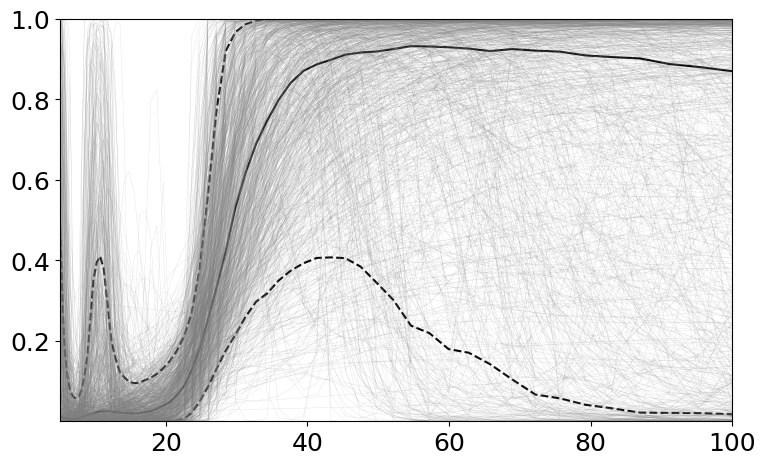

In [3]:
plt.rcParams.update({
    'font.size': 18})

logm_grid = np.linspace(0, 2., 100)  # This should match your GP definition
mixture_fraction_samples = data.posterior["mixture_fraction_grid"].values  # (chains, samples, 100)
# Compute the mean and credible intervals
mixture_fraction_mean = np.median(mixture_fraction_samples, axis=(0, 1))  # Average over chains & samples
mixture_fraction_lower = np.percentile(mixture_fraction_samples, 10, axis=(0, 1))  # 16th percentile
mixture_fraction_upper = np.percentile(mixture_fraction_samples, 90, axis=(0, 1))  # 84th percentile

#mixture_fraction_lower = np.percentile(mixture_fraction_samples, 20, axis=(0, 1))  # 16th percentile
#mixture_fraction_upper = np.percentile(mixture_fraction_samples, 80, axis=(0, 1))  # 84th percentile

# Convert logm_grid to m1
m1_grid = 10 ** logm_grid  # Since logm_grid = log10(m1), take exponent

# Plot mixture fraction vs m1
plt.figure(figsize=(8, 5))

# Select a few random traces to plot
plt.plot(m1_grid, mixture_fraction_mean, color="black")
plt.plot(m1_grid, mixture_fraction_lower, color="black", linestyle='--')
plt.plot(m1_grid, mixture_fraction_upper, color="black", linestyle='--')

#plt.fill_between(m1_grid, mixture_fraction_lower, mixture_fraction_upper, color="grey", alpha=0.3)
#plt.xscale("log")  # Log scale for mass

n_traces = 1000  # Number of traces to plot
mixture_fraction_samples_flat = mixture_fraction_samples.reshape(-1, 100)
trace_indices = np.random.choice(mixture_fraction_samples_flat.shape[0], n_traces, replace=False)
#trace_indices_sigma = np.random.choice(sigma_samples_flat.shape[0], n_traces, replace=False)

for idx in trace_indices:
    plt.plot(m1_grid, mixture_fraction_samples_flat[idx, :], color='gray', alpha=.3, linewidth=.2)

plt.text(8, 0.9, '')
#plt.grid(True)

#plt.yscale("log")
#plt.xscale("log")
plt.xlim(5,100)
plt.ylim(0.0001, 1)
plt.legend(frameon=False)
#plt.rcParams["text.usetex"] = True
plt.tight_layout()
plt.show()


# Extract mCut posterior samples and flatten
#mCut_posterior = data.posterior["B"].values.flatten()

# Compute mean and credible intervals
#mCut_mean = np.mean(mCut_posterior)
#mCut_lower = np.percentile(mCut_posterior, 10)
#mCut_upper = np.percentile(mCut_posterior, 90)

# Disable LaTeX rendering
#plt.rcParams["text.usetex"] = False  
# Plot histogram
#plt.figure(figsize=(8, 5))
#plt.hist(mCut_posterior, density=True, alpha=0.7, color="b", edgecolor="black")
#plt.axvline(mCut_mean, color="r", linestyle="--", label=f"Mean: {mCut_mean:.2f}")
#plt.axvspan(mCut_lower, mCut_upper, color="r", alpha=0.3, label="68% CI")
#plt.xlabel("m_cut")  # Remove LaTeX formatting
#plt.ylabel("Density")
#plt.title("Posterior Distribution of m_cut")
#plt.legend()
#plt.grid(True)
#plt.show()

(1000,)


<>:92: SyntaxWarning: invalid escape sequence '\o'
<>:92: SyntaxWarning: invalid escape sequence '\o'
/var/folders/br/6kr1ylg91vs2ycfxh7h2xv_w0000gn/T/ipykernel_76573/2027034546.py:92: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("Merger rate [$\\rm Gpc^{-3}yr^{-1}M_{\odot}^{-1}$]")


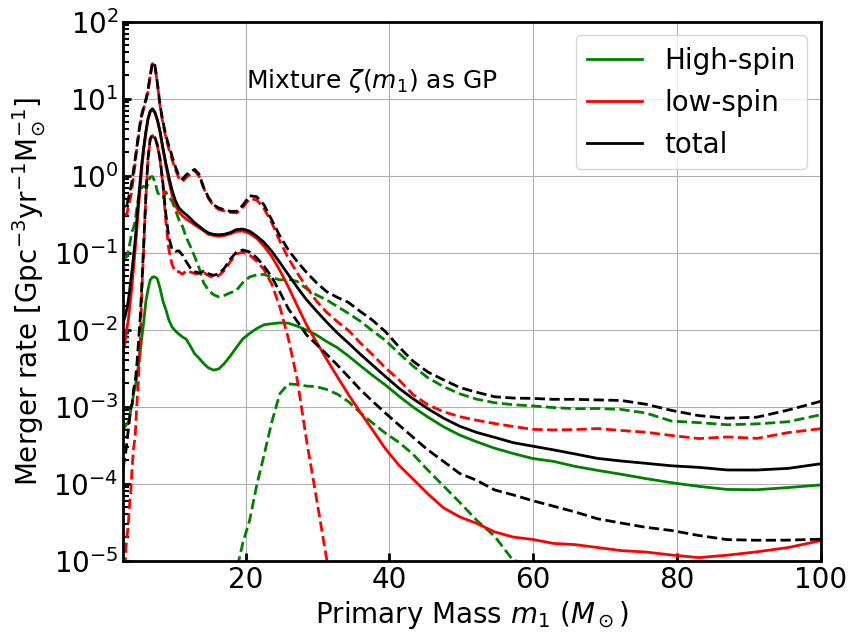

In [5]:
# use this if mass is also non-parametric
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from utilities import *

plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
     # Line and axes width
    'lines.linewidth': 2,          # default line width
    'axes.linewidth': 2,           # width of plot borders (spines)
    'xtick.major.width': 2,        # major tick width
    'ytick.major.width': 2,
    'xtick.minor.width': 1.5,
    'ytick.minor.width': 1.5,
    'xtick.major.size': 6,         # major tick length
    'ytick.major.size': 6,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    # Tick direction (optional, looks cleaner)
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})

samps = data.posterior.stack(draws=("chain", "draw"))
# Extract posterior samples
rate = data.posterior.R20.values  # Shape: (chains, draws)
# Define the m1 grid
m_grid = np.linspace(0, 2., 100)  # Must match the GP setup

m1_sample = data.posterior.p_m1_grid.values  # Shape: (chains, draws, grid_size)
m1_sample=m1_sample[0]          

mixture_fraction_det = mixture_fraction_samples[0]  # Shape: (100, 1000)
rate_flat = rate.reshape(-1)  # Flatten rate to match sample shape

p_20 = np.array([np.interp(np.log10(20), m_grid, sample) for sample in m1_sample])
print(p_20.shape)
# Rescale m1_samples_flat by p_20
m1_scaled = m1_sample*rate_flat[:, np.newaxis]*mixture_fraction_det/p_20[:, np.newaxis] # Shape: (chains * draws, 100)
m2_scaled = m1_sample*rate_flat[:, np.newaxis]*(1-mixture_fraction_det)/p_20[:, np.newaxis] # Shape: (chains * draws, 100)
mtot = m1_scaled+m2_scaled

# Compute summary statistics
mass_mean = np.median(m1_scaled, axis=0)
mass_upper = np.percentile(m1_scaled, 95, axis=0)
mass_lower = np.percentile(m1_scaled, 5, axis=0)
mass_mean2 = np.median(m2_scaled, axis=0)
mass_upper2 = np.percentile(m2_scaled, 95, axis=0)
mass_lower2= np.percentile(m2_scaled, 5, axis=0)
mass_mean3 = np.median(mtot, axis=0)
mass_upper3 = np.percentile(mtot, 95, axis=0)
mass_lower3 = np.percentile(mtot, 5, axis=0)
#mass_mean = np.array([np.mean(m1_scaled[i, np.isfinite(m1_scaled[i, :])]) for i in range(m1_scaled.shape[0])])

# Plot results
plt.figure(figsize=(9, 7))
#
# Select a subset of traces
# Plot a few mtot tracers
n_tracers = 1000
#for i in range(n_tracers):
#    plt.plot(10**m_grid, mtot[i],color='gray',lw=0.3, alpha=0.4, linestyle='--')

plt.plot(10**m_grid, mass_mean, color='green', label='High-spin')
plt.plot(10**m_grid, mass_lower, color='green',linestyle='--')
plt.plot(10**m_grid, mass_upper, color='green',linestyle='--')
#plt.fill_between(10**m_grid, mass_lower, mass_upper, color='green', alpha=0.3)


plt.plot(10**m_grid, mass_mean2, color='red', label='low-spin')
plt.plot(10**m_grid, mass_lower2, color='red',linestyle='--')
plt.plot(10**m_grid, mass_upper2, color='red',linestyle='--')
#plt.fill_between(10**m_grid, mass_lower2, mass_upper2, color='red', alpha=0.3)

plt.plot(10**m_grid, mass_mean3, color='black',  label='total')
plt.plot(10**m_grid, mass_lower3, color='black', linestyle='--')
plt.plot(10**m_grid, mass_upper3, color='black', linestyle='--')
#plt.fill_between(10**m_grid, mass_lower3, mass_upper3, color='black', alpha=0.3)

plt.text(20, 14, r'Mixture $\zeta(m_1)$ as GP', fontsize=18)

plt.ylim(1e-5, 100)
plt.xlim(3, 100)
plt.yscale("log")  # Log scale for y-axis
plt.xlabel("Primary Mass $m_1$ ($M_\\odot$)")
plt.ylabel("Merger rate [$\\rm Gpc^{-3}yr^{-1}M_{\odot}^{-1}$]")
plt.legend()
plt.grid(True)

plt.show()


In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde
#
# # Read whitespace-separated file with variable text/numbers
# df = pd.read_csv("mergers_10001_2.txt", sep=r"\s+", header=None, engine="python", comment="#")
#
# # Third column = index 2; second-to-last column = -2
# col3 = pd.to_numeric(df.iloc[:, 2], errors="coerce")
# sel  = pd.to_numeric(df.iloc[:, -2], errors="coerce")
#
# mask = sel == 1
# vals = col3[mask].dropna()
#
# #plt.hist(vals, bins=30, edgecolor="black", alpha=0.7)
#
# # KDE (smooth curve)
# kde = gaussian_kde(vals)
# x = np.linspace(min(vals), max(vals), 500)
# plt.plot(x, kde(x), color="red", linewidth=2, label="KDE")
# plt.xlabel("Third column values")
# plt.ylabel("Count")
# plt.title("Third column where second-to-last column == 1")
# plt.show()


/var/folders/br/6kr1ylg91vs2ycfxh7h2xv_w0000gn/T/ipykernel_76573/453374069.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/br/6kr1ylg91vs2ycfxh7h2xv_w0000gn/T/ipykernel_76573/453374069.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


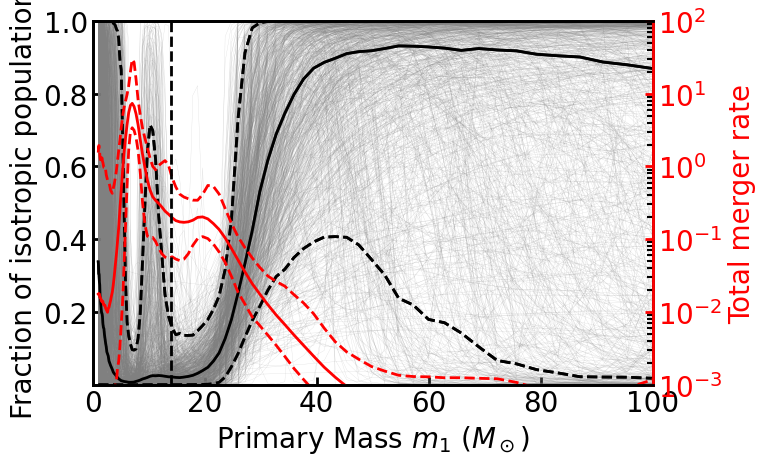

In [8]:
plt.rcParams.update({
    'font.size': 18})

logm_grid = np.linspace(0, 2.3, 100)  # This should match your GP definition
mixture_fraction_samples = data.posterior["mixture_fraction_grid"].values  # (chains, samples, 100)
# Compute the mean and credible intervals
mixture_fraction_mean = np.median(mixture_fraction_samples, axis=(0, 1))  # Average over chains & samples
mixture_fraction_lower = np.percentile(mixture_fraction_samples, 10, axis=(0, 1))  # 16th percentile
mixture_fraction_upper = np.percentile(mixture_fraction_samples, 95, axis=(0, 1))  # 84th percentile

#mixture_fraction_lower = np.percentile(mixture_fraction_samples, 20, axis=(0, 1))  # 16th percentile
#mixture_fraction_upper = np.percentile(mixture_fraction_samples, 80, axis=(0, 1))  # 84th percentile


# Convert logm_grid to m1
m1_grid = 10 ** logm_grid  # Since logm_grid = log10(m1), take exponent

# Plot mixture fraction vs m1
plt.figure(figsize=(8, 5))

# Select a few random traces to plot
plt.plot(m1_grid, mixture_fraction_mean, color="black")
plt.plot(m1_grid, mixture_fraction_lower, color="black", linestyle='--')
plt.plot(m1_grid, mixture_fraction_upper, color="black", linestyle='--')

#plt.fill_between(m1_grid, mixture_fraction_lower, mixture_fraction_upper, color="grey", alpha=0.3)
#plt.xscale("log")  # Log scale for mass
plt.xlabel(r"Primary Mass $m_1$ ($M_\odot$)")
plt.ylabel("Fraction of isotropic population")
plt.legend()

mixture_fraction_samples_flat=mixture_fraction_samples.reshape(-1, 100)

n_traces = 1000  # Number of traces to plot
trace_indices = np.random.choice(mixture_fraction_samples_flat.shape[0], n_traces, replace=False)
#trace_indices_sigma = np.random.choice(sigma_samples_flat.shape[0], n_traces, replace=False)

for idx in trace_indices:
    plt.plot(m1_grid, mixture_fraction_samples_flat[idx, :], color='gray', alpha=.3, linewidth=.2)

plt.xlim(0,100)
plt.ylim(0.0001,1)
#plt.yscale("log")
#plt.xscale("log")
plt.legend(frameon=False)

plt.plot(m1_grid, mixture_fraction_mean, color="black")
plt.plot(m1_grid, mixture_fraction_lower, color="black", linestyle='--')
plt.plot(m1_grid, mixture_fraction_upper, color="black", linestyle='--')
plt.text(8, 0.9, '')
#plt.grid(True)
#plt.plot(10**m_grid, masst_mean, color='black',  label='total')


# --- Secondary y-axis for masst_mean on the RIGHT, styled in red ---
ax = plt.gca()                 # left axis (mixture fraction)
ax2 = ax.twinx()               # right axis

# Plot masst_mean on the right axis
#plt.plot(x, kde(x), color="red", linewidth=2, label="KDE")

plt.plot(10**m_grid, mass_mean3, color='red')
plt.plot(10**m_grid, mass_lower3, color='red', linestyle='--')
plt.plot(10**m_grid, mass_upper3, color='red', linestyle='--')
# Style the right axis in red
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.label.set_color('red')
ax2.set_ylabel('Total merger rate', color='red')

# Set log scale and limits for right axis
ax2.set_yscale('log')
ax2.set_ylim(1e-3, 1e2)  # 10^-5 to 10^1

# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='lower left')
plt.axvline(x=14, color="black", linestyle="--", linewidth=2, label="x = 14")

#plt.rcParams["text.usetex"] = True
plt.tight_layout()
plt.show()

# Extract mCut posterior samples and flatten
#mCut_posterior = data.posterior["B"].values.flatten()

# Compute mean and credible intervals
#mCut_mean = np.mean(mCut_posterior)
#mCut_lower = np.percentile(mCut_posterior, 10)
#mCut_upper = np.percentile(mCut_posterior, 90)

# Disable LaTeX rendering
#plt.rcParams["text.usetex"] = False  
# Plot histogram
#plt.figure(figsize=(8, 5))
#plt.hist(mCut_posterior, density=True, alpha=0.7, color="b", edgecolor="black")
#plt.axvline(mCut_mean, color="r", linestyle="--", label=f"Mean: {mCut_mean:.2f}")
#plt.axvspan(mCut_lower, mCut_upper, color="r", alpha=0.3, label="68% CI")
#plt.xlabel("m_cut")  # Remove LaTeX formatting
#plt.ylabel("Density")
#plt.title("Posterior Distribution of m_cut")
#plt.legend()
#plt.grid(True)
#plt.show()


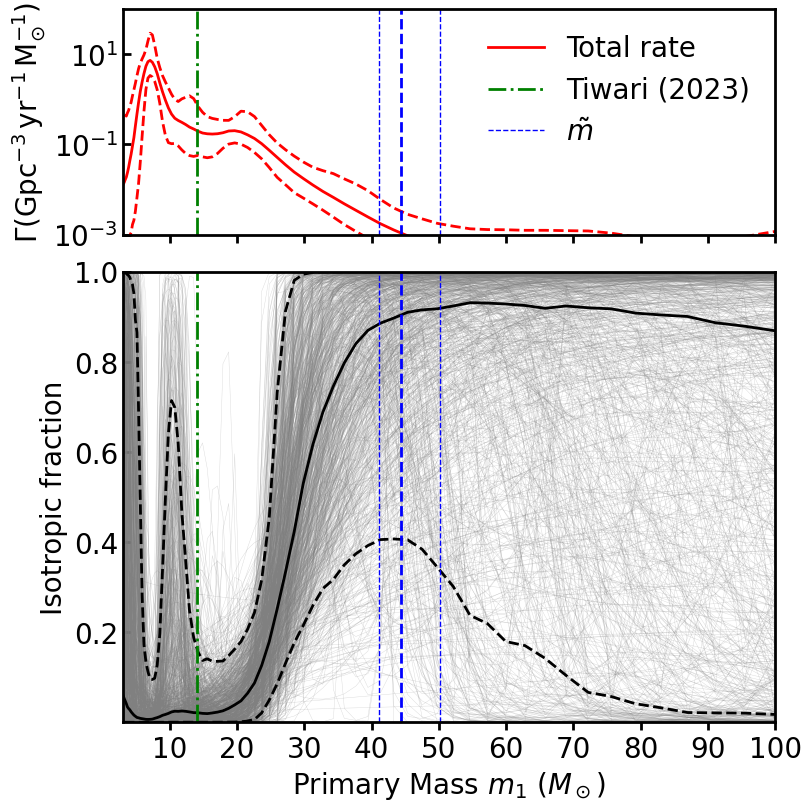

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, figsize=(8, 8), sharex=True,
    gridspec_kw={'height_ratios': [1, 2]},  # top 1/3, bottom 2/3
    constrained_layout=True
)

# ---------------------------
# TOP PANEL: total merger rate
# ---------------------------
ax_top.plot(10**m_grid, mass_mean3, color='red', label="Total rate")
ax_top.plot(10**m_grid, mass_lower3, color='red', linestyle='--')
ax_top.plot(10**m_grid, mass_upper3, color='red', linestyle='--')

ax_top.set_yscale('log')
ax_top.set_ylim(1e-3, 1e2)
ax_top.set_ylabel(r"$\Gamma$(${\rm Gpc^{-3}\,yr^{-1}\,M_{\odot}^{-1}}$)", color="red")
#ax_top.spines['left'].set_color('red')
ax_top.yaxis.label.set_color('black')
ax_top.tick_params(axis='y', colors='black')
ax_top.axvline(x=14, color="green", linestyle="-.", linewidth=2,label="Tiwari (2023)")

ax_top.legend(frameon=False, loc="upper right")

# ---------------------------
# BOTTOM PANEL: mixture fraction
# ---------------------------

# Random traces
mixture_fraction_samples_flat = mixture_fraction_samples.reshape(-1, 100)
n_traces = 1000
trace_indices = np.random.choice(mixture_fraction_samples_flat.shape[0], n_traces, replace=False)
for idx in trace_indices:
    ax_bottom.plot(m1_grid, mixture_fraction_samples_flat[idx, :], color='gray', alpha=.3, linewidth=.3)
# Main curves
ax_bottom.plot(m1_grid, mixture_fraction_mean, color="black")
ax_bottom.plot(m1_grid, mixture_fraction_lower, color="black", linestyle='--')
ax_bottom.plot(m1_grid, mixture_fraction_upper, color="black", linestyle='--')

      
    
ax_bottom.set_xlim(3, 100)
ax_bottom.set_ylim(1e-4, 1)
ax_bottom.set_xlabel(r"Primary Mass $m_1$ ($M_\odot$)")
ax_bottom.set_ylabel("Isotropic fraction")
ax_bottom.axvline(x=14, color="green", linestyle="-.", linewidth=2)


ax_bottom.tick_params(axis='x', direction='out')
from matplotlib.ticker import MultipleLocator
ax_bottom.xaxis.set_major_locator(MultipleLocator(10))
ax_bottom.xaxis.set_minor_locator(MultipleLocator(5)) 

ax_top.tick_params(axis='x', direction='out')
from matplotlib.ticker import MultipleLocator
ax_top.xaxis.set_major_locator(MultipleLocator(10))

ax_bottom.xaxis.set_minor_locator(plt.NullLocator())
ax_top.xaxis.set_minor_locator(plt.NullLocator())
# Vertical reference lines in both panels
for ax in [ax_top, ax_bottom]:
    ax.axvline(x=42.1+2.2, color="blue", linestyle="--", linewidth=2)
    ax.axvline(x=42.1+2.2-3.2, color="blue", linestyle="--", linewidth=1)
    # draw at 52 in both, but only add label for the top
    if ax is ax_top:
        ax.axvline(x=42.1+2.2+5.9, color="blue", linestyle="--", linewidth=1, label=r"$\tilde{m}$")
    else:
        ax.axvline(x=42.1+2.2+5.9, color="blue", linestyle="--", linewidth=1)
ax_top.legend(frameon=False, loc="upper right")


# ---------------------------
# SAVE + SHOW
# ---------------------------
plt.show()


In [10]:
stacked_samples = data.posterior.stack(draws=("chain", "draw"))

fig = plt.figure(figsize=(13,13))

toPlot = {
#    "mCut2":{"data":stacked_samples.mCut,"plot_bounds":(20,90),"label":r"$\tilde{m}$"},  
    "R20":{"data":stacked_samples.logR20,"plot_bounds":(-1.5,1),"label":r"$\log R_{\rm 20}$"},
    "mu":{"data":stacked_samples.mu_eff_lowM,"plot_bounds":(-0.05,0.2),"label":r"$\mu$"},
    "sigma":{"data":stacked_samples.logsig_eff_lowM,"plot_bounds":(-2,0),"label":r"$\sigma$"},
    "logA2":{"data":(stacked_samples.logA),"plot_bounds":(-1,2),"label":r"$\log a_\chi^2$"},    
    "logC2":{"data":(stacked_samples.logC),"plot_bounds":(0,2),"label":r"$\log a_m^2$"},
    "logB2":{"data":stacked_samples.logB,"plot_bounds":(-1,2.1),"label":r"$\log \ell_\chi$"},    
    "logD2":{"data":stacked_samples.logD,"plot_bounds":(-1,-0.4),"label":r"$\log \ell_m$"},
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
     "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\mathcal{N}$"},
    "nEff_inj":{"data":np.log10(stacked_samples.nEff_inj_per_event),"plot_bounds":(0,3),"label":r"$\log \left(\frac{N_{\mathrm{eff}}^{\mathrm{inj}}}{N_{\mathrm{obs}}} \right)$"},
#    "nEff_inj":{"data":np.log10(stacked_samples.nEff_inj_per_event),"plot_bounds":(0,3),"label":r"$\log \left({N_{\mathrm{eff}}^{\mathrm{inj}}}/{N_{\mathrm{obs}}} \right)$"},
    #    "logsig_eff_lowM":{"data":stacked_samples.logsig_eff,"plot_bounds":(-1.5,0),"label":r"$\log\sigma_\mathrm{eff,low}$"},
#    "logab":{"data":np.log10(stacked_samples.A**2/stacked_samples.B),"plot_bounds":(-2,4),"label":r"$logB/A$"},
#"chi_min":{"data":stacked_samples.min_chi_eff,"plot_bounds":(-1,1),"label":r"$\chi_{\mathrm{eff,min}}$"},
}
plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.1)

AttributeError: 'Dataset' object has no attribute 'logA'

<Figure size 1300x1300 with 0 Axes>

<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
/var/folders/br/6kr1ylg91vs2ycfxh7h2xv_w0000gn/T/ipykernel_76573/593502725.py:62: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("Merger rate [$\\rm Gpc^{-3}yr^{-1}M_{\odot}^{-1}$]")


(1000, 100) (1000, 100) (1, 1000) (1000, 100)


/var/folders/br/6kr1ylg91vs2ycfxh7h2xv_w0000gn/T/ipykernel_76573/593502725.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


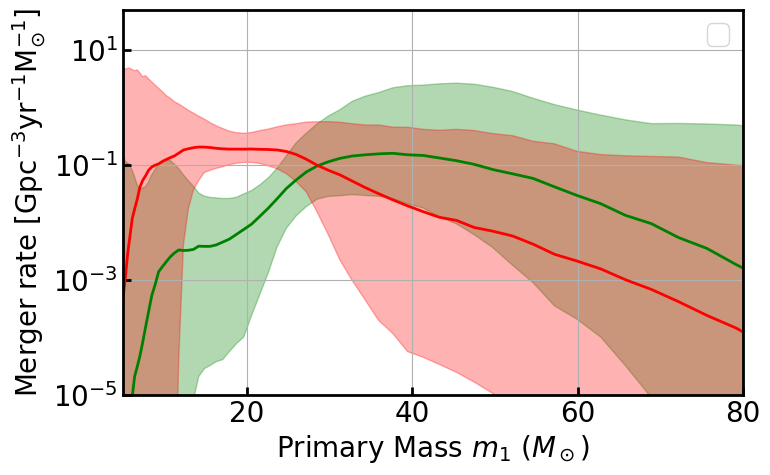

In [11]:

import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from utilities import *


samps = data.posterior.stack(draws=("chain", "draw"))
# Extract posterior samples
rate = data.posterior.R20.values  # Shape: (chains, draws)
# Define the m1 grid
m_grid = np.linspace(0, 2, 100)  # Must match the GP setup

m1_sample= np.zeros((samps.mu_eff_lowM.size,m_grid.size))
p_20=np.zeros((samps.mu_eff_lowM.size,m_grid.size))
for i in range(samps.mu_eff_lowM.size):    
    mass= massModel(10**m_grid, samps.alpha.values[i], samps.mu_m1.values[i], samps.sig_m1.values[i],
                    10.**samps.log_f_peak.values[i], samps.mMax.values[i], samps.mMin.values[i],
                    10.**samps.log_dmMax.values[i], 10.**samps.log_dmMin.values[i])
    p_20_v= massModel(20, samps.alpha.values[i], samps.mu_m1.values[i], samps.sig_m1.values[i],
                    10.**samps.log_f_peak.values[i], samps.mMax.values[i], samps.mMin.values[i],
                    10.**samps.log_dmMax.values[i], 10.**samps.log_dmMin.values[i])
    m1_sample[i]=mass
    p_20[i]=p_20_v
            
#m1_samples_flat = m1_samples.reshape(-1, 100)  # Shape: (chains * draws, grid_size)
#mixture_fraction_det = mixture_fraction_samples#.T  # Shape: (chains * draws, 100)
mixture_fraction_det = mixture_fraction_samples[0]  # Shape: (100, 1000)
print(mixture_fraction_det.shape,m1_sample.shape,rate.shape,p_20.shape)      
rate_flat = rate.reshape(-1)  # Flatten rate to match sample shape

# Rescale m1_samples_flat by p_20
m1_scaled = m1_sample*mixture_fraction_det*rate_flat[:, np.newaxis]/p_20 # Shape: (chains * draws, 100)
m2_scaled = m1_sample*rate_flat[:, np.newaxis]/p_20*(1-mixture_fraction_det) # Shape: (chains * draws, 100)
#mtot = m1_samples #* rate_flat[:, np.newaxis]/p_20[:, np.newaxis] # Shape: (chains * draws, 100)

# Compute summary statistics
mass_mean = np.median(m1_scaled, axis=0)
mass_upper = np.percentile(m1_scaled, 90, axis=0)
mass_lower = np.percentile(m1_scaled, 10, axis=0)
mass_mean2 = np.median(m2_scaled, axis=0)
mass_upper2 = np.percentile(m2_scaled, 90, axis=0)
mass_lower2= np.percentile(m2_scaled, 10, axis=0)
#masst_mean = np.median(mtot, axis=(0,1))
#mass_mean = np.array([np.mean(m1_scaled[i, np.isfinite(m1_scaled[i, :])]) for i in range(m1_scaled.shape[0])])

# Plot results
plt.figure(figsize=(8, 5))

plt.plot(10**m_grid, mass_mean, color='green', linewidth=2)
plt.fill_between(10**m_grid, mass_lower, mass_upper, color='green', alpha=0.3)


plt.plot(10**m_grid, mass_mean2, color='red', linewidth=2, label='')
plt.fill_between(10**m_grid, mass_lower2, mass_upper2, color='red', alpha=0.3)

#plt.plot(10**m1_grid, masst_mean, color='black', linewidth=2)

plt.ylim(1e-5, 50)
plt.xlim(5, 80)
plt.yscale("log")  # Log scale for y-axis
plt.xlabel("Primary Mass $m_1$ ($M_\\odot$)")
plt.ylabel("Merger rate [$\\rm Gpc^{-3}yr^{-1}M_{\odot}^{-1}$]")
plt.legend()
plt.grid(True)

plt.show()